In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 2.Checking basic details

In [5]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


In [8]:
for i in df.columns:
  print(df[i].value_counts())
  print("-----------------------------------------")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
-----------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------------
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th            

There is no missing values present when we checked earlier but null values are present in the form of "?"

In [9]:
df= df.replace(' ?', np.nan)

In [10]:
print(df.isnull().sum())

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64


In [11]:
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace=True)

In [12]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


# 3.EDA

<AxesSubplot:xlabel='Age', ylabel='count'>

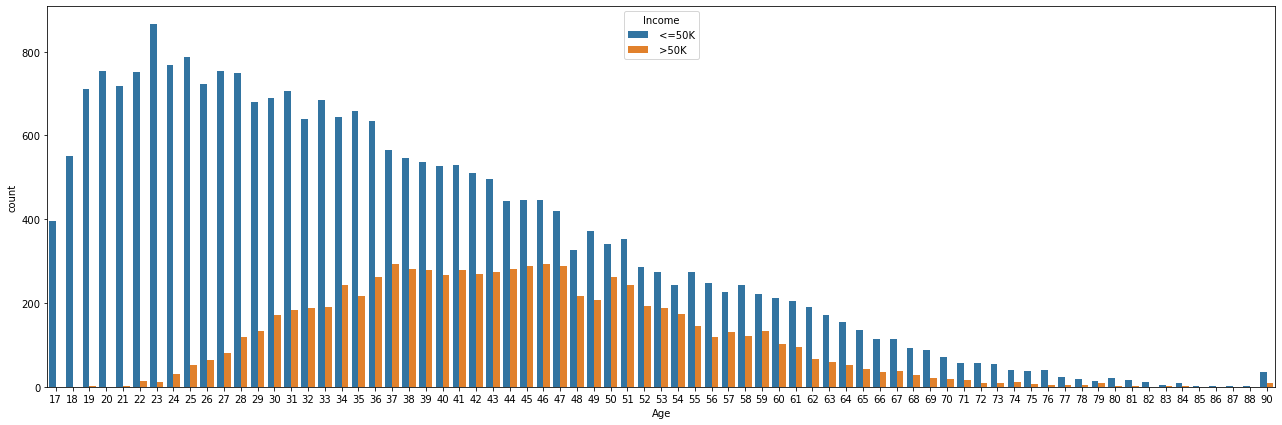

In [13]:
plt.figure(figsize=(22,7))
sns.countplot(x='Age',hue='Income',data=df)

We can notice here in age of 17 to 30 most of people having less than 50k of income and after when in increasing age we see in category of more then 50k no of people are increasing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

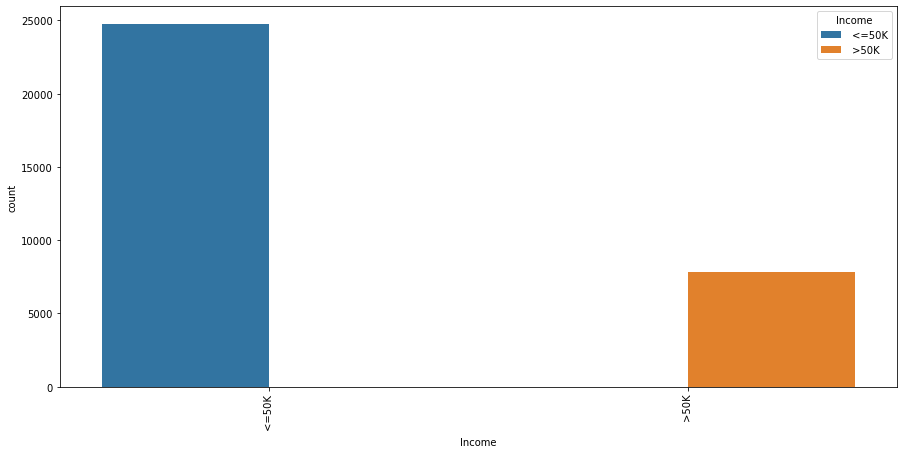

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='Income',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

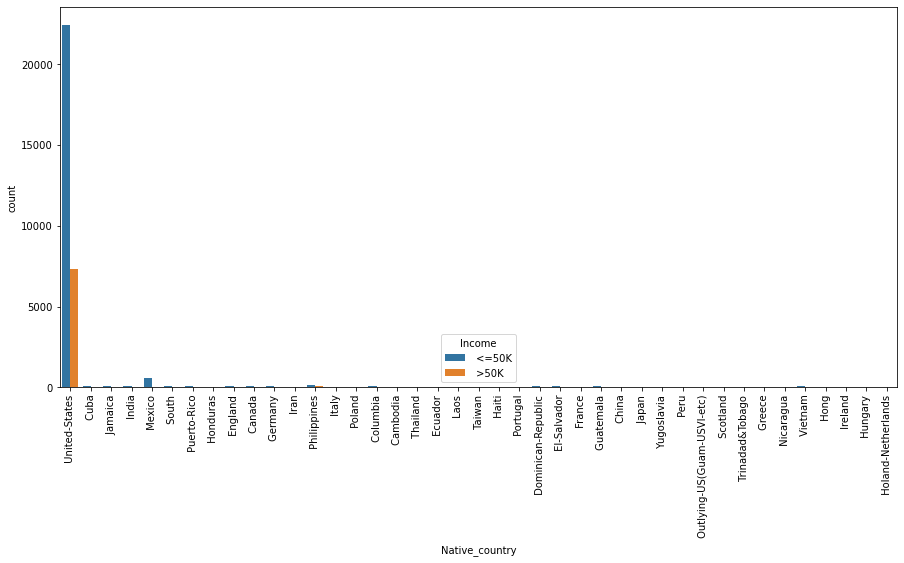

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x='Native_country',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

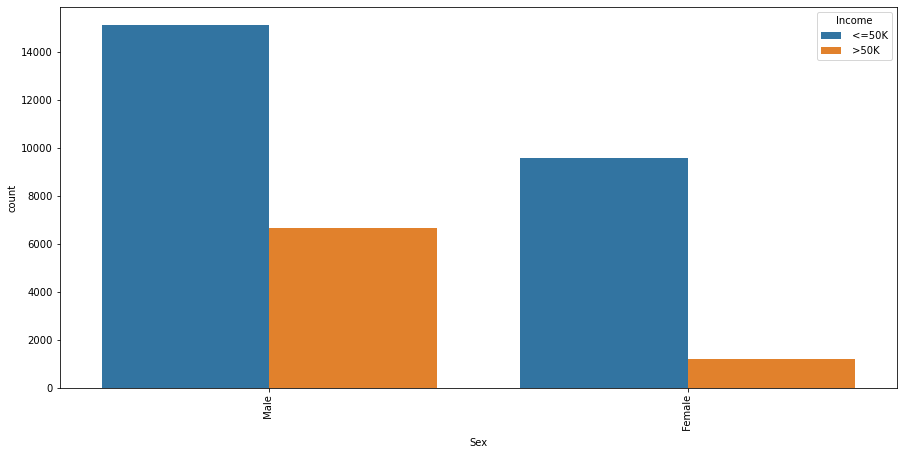

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

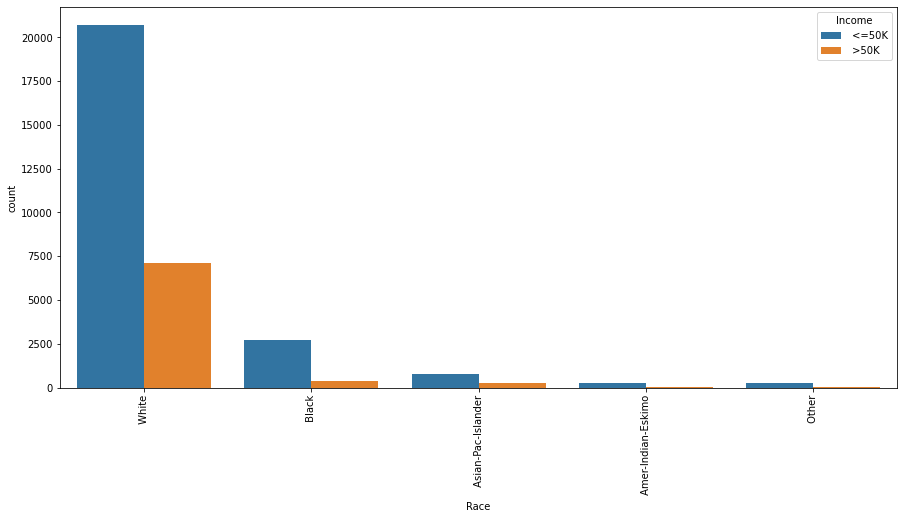

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x='Race',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

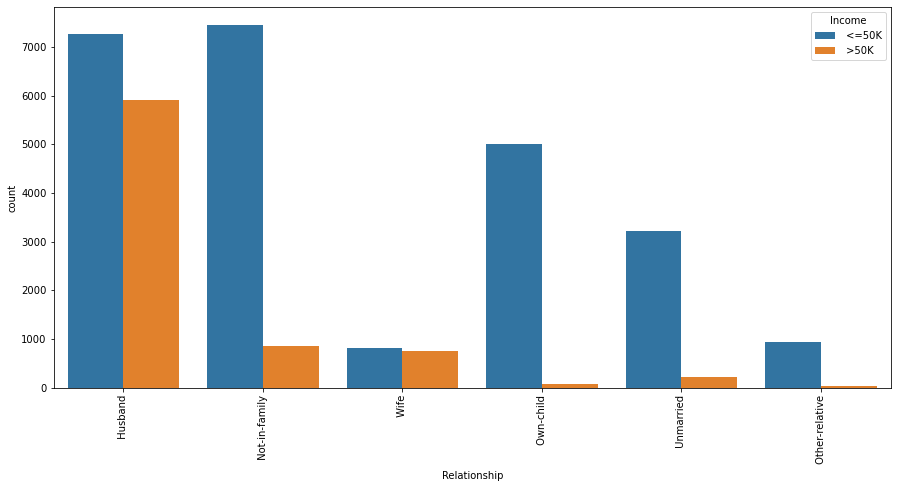

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

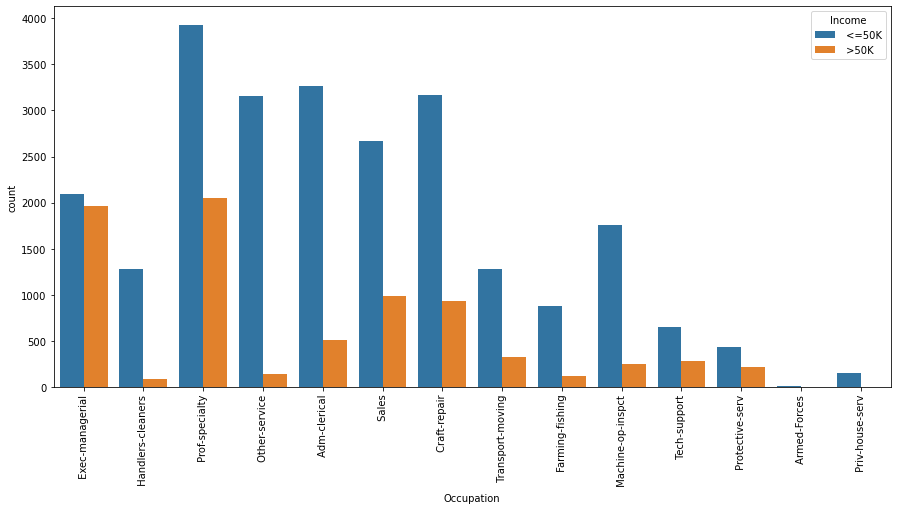

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

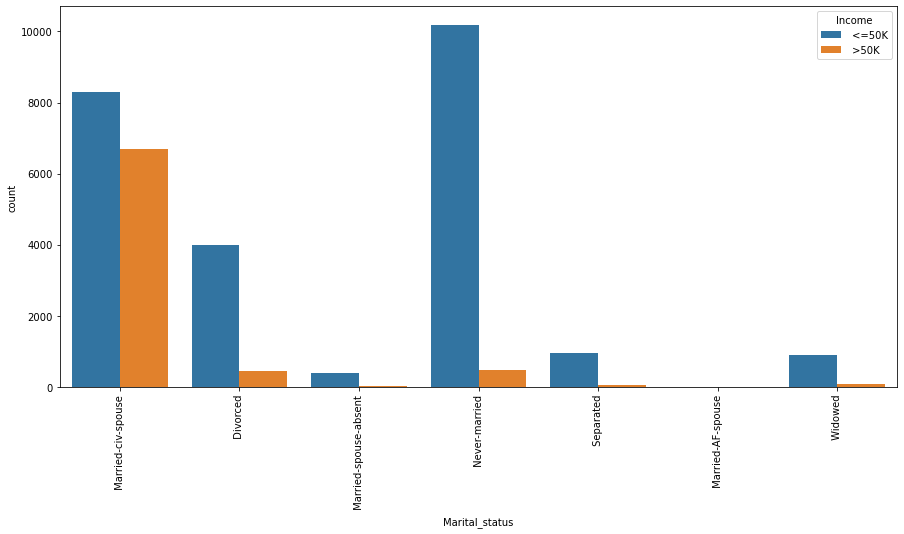

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

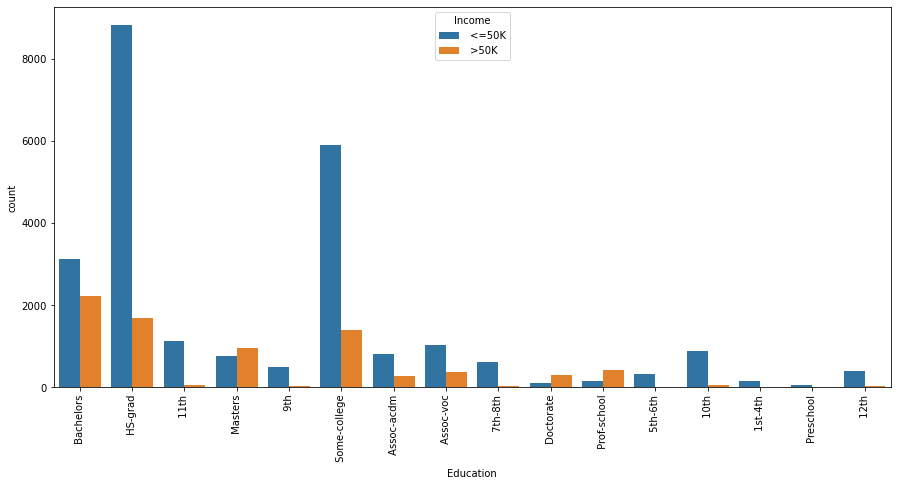

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Income',data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

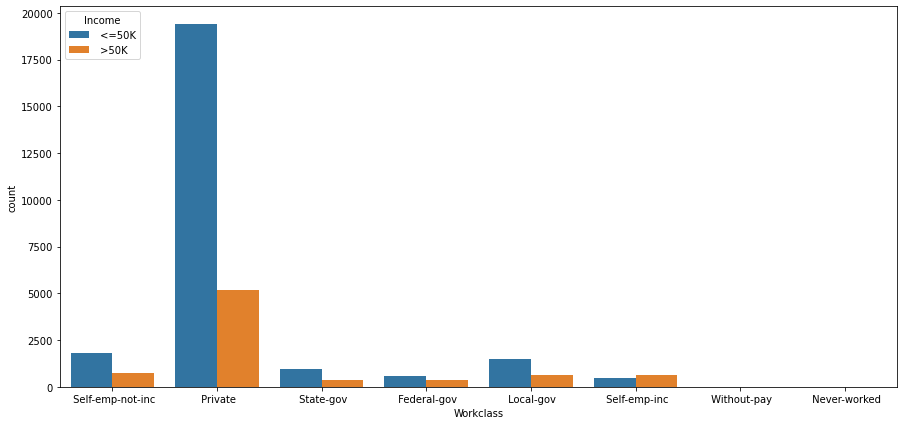

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',hue='Income',data=df)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

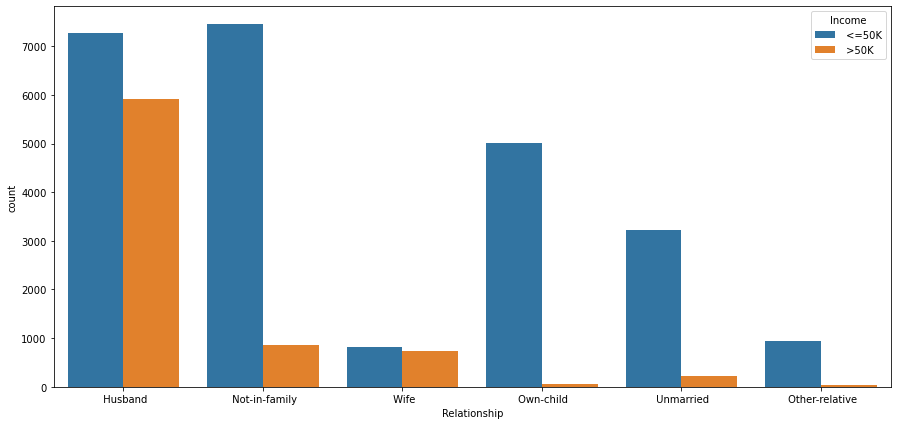

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)

# 4. Data pre-processing

Encoding

In [25]:
categ_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

In [26]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [28]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


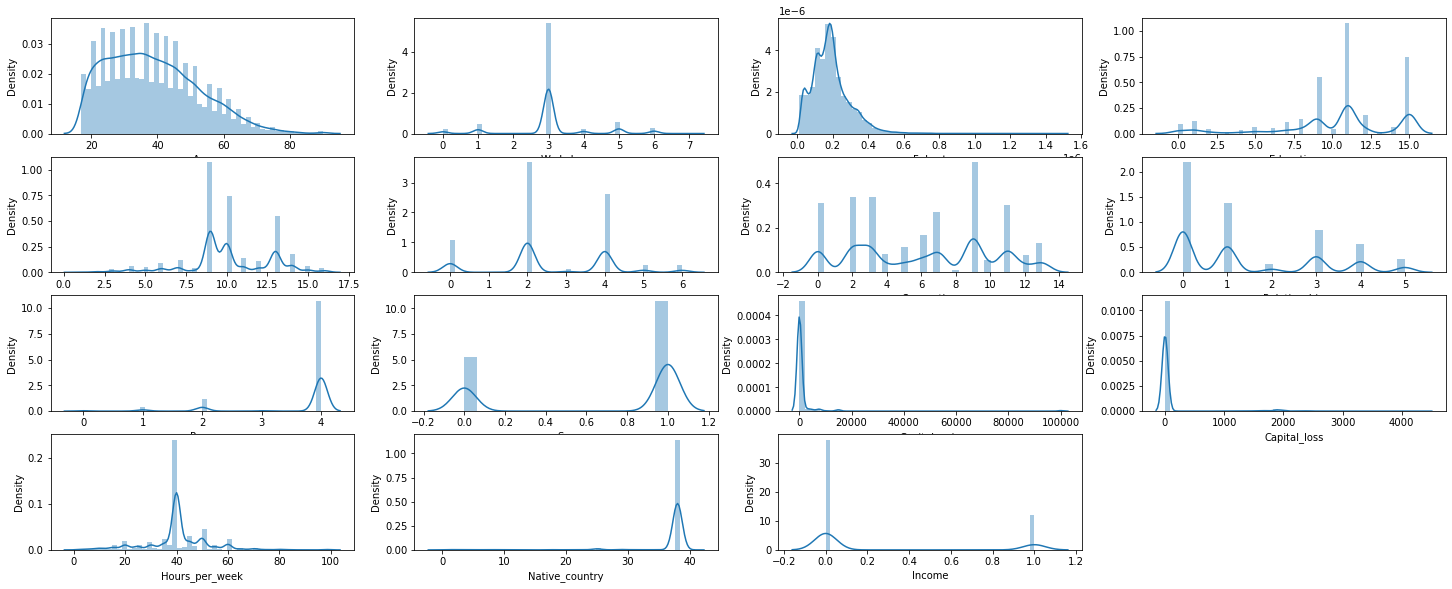

In [29]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]])

In [30]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

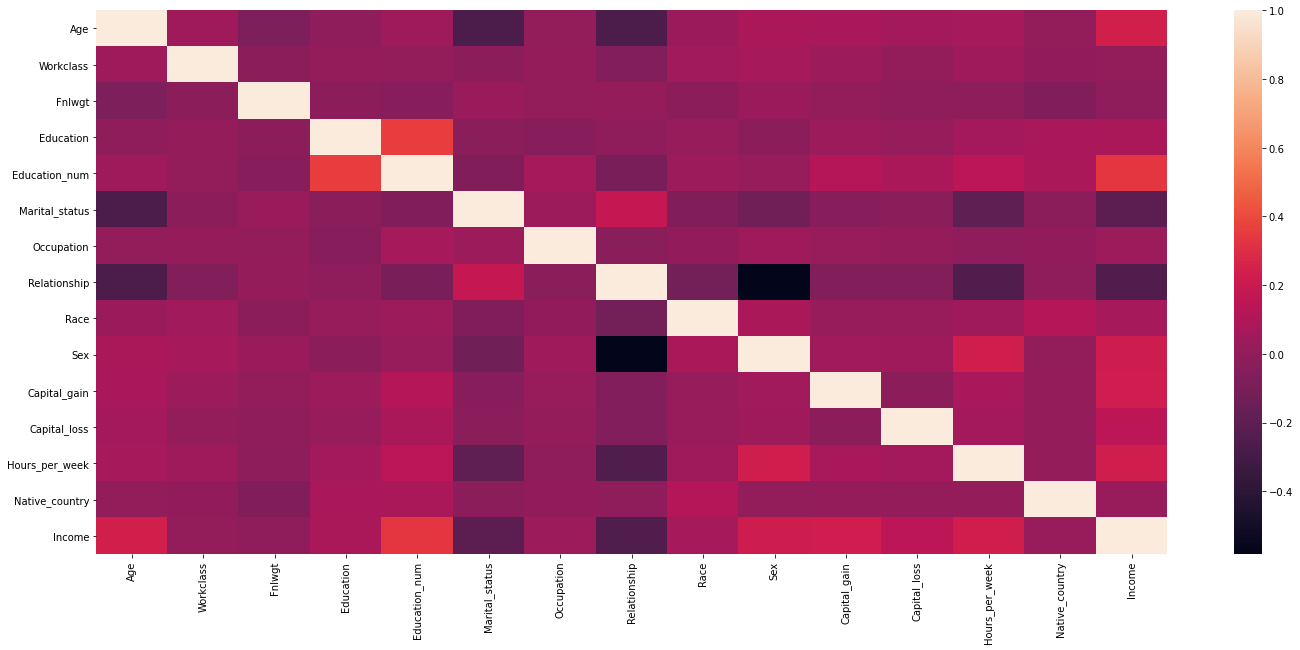

In [31]:
df_corr=df.corr()
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

# Skewness removal

In [32]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

In [33]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (32560, 15)
[[0.83709708 1.72133587 1.0087417  ... 2.22212013 0.26137428 0.5632099 ]
 [0.04264043 0.08522344 0.24504633 ... 0.03542999 0.26137428 0.5632099 ]
 [1.05703146 0.08522344 0.42576955 ... 0.03542999 0.26137428 0.5632099 ]
 ...
 [1.42358875 0.08522344 0.3588108  ... 0.03542999 0.26137428 0.5632099 ]
 [1.21562378 0.08522344 0.11092744 ... 1.65520046 0.26137428 0.5632099 ]
 [0.98372    0.81805622 0.92986178 ... 0.03542999 0.26137428 1.77553698]]


In [34]:
threshold = 3
print(np.where(z > 3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [35]:
after_zscore = df[(z < 3).all(axis=1)]

In [36]:
after_zscore.shape

(27770, 15)

In [37]:
df.shape

(32560, 15)

In [38]:
100-(27770/32560)*100

14.711302211302211

Removing outlier using z score is not suggested bcz of 14% data loss

In [39]:
df1=df[['Age','Fnlwgt','Capital_gain','Capital_loss']]

In [40]:
df1 = np.sqrt(df)

df1.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,2.236068,288.636450,3.000000,3.605551,1.414214,1.732051,0.000000,2.000000,1.0,0.0,0.0,3.605551,6.164414,0.0
1,6.164414,1.732051,464.377002,3.316625,3.000000,0.000000,2.236068,1.000000,2.000000,1.0,0.0,0.0,6.324555,6.164414,0.0
2,7.280110,1.732051,484.480134,1.000000,2.645751,1.414214,2.236068,0.000000,1.414214,1.0,0.0,0.0,6.324555,6.164414,0.0
3,5.291503,1.732051,581.729318,3.000000,3.605551,1.414214,3.000000,2.236068,1.414214,0.0,0.0,0.0,6.324555,2.000000,0.0
4,6.082763,1.732051,533.462276,3.464102,3.741657,1.414214,1.732051,2.236068,2.000000,0.0,0.0,0.0,6.324555,6.164414,0.0


In [41]:
df1.skew()

Age               0.204335
Workclass        -2.113018
Fnlwgt            0.189066
Education        -2.062119
Education_num    -1.023535
Marital_status   -1.203232
Occupation       -0.836050
Relationship      0.150789
Race             -3.472696
Sex              -0.719244
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week   -0.984894
Native_country   -4.976745
Income            1.212383
dtype: float64

In [42]:
df=df1

In [43]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

4.0

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(15066, 15)


Removing data using interquartile methord is also not recomended because of high loss of data.

# 5.Feature Engineering

In [45]:
y = df['Income']
x = df.drop('Income', axis = 1)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

## Treating data imbalance

In [48]:
print(df['Income'].value_counts())

0.0    24719
1.0     7841
Name: Income, dtype: int64


In [49]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Income==0]
label1=X[X.Income==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.Income.value_counts()

0.0    19761
1.0    19761
Name: Income, dtype: int64

In [50]:
x_train= unsampled.drop(columns='Income')
y_train= unsampled['Income']

In [51]:
x_train.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

# Scaling

In [52]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [53]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [54]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000
mean,0.402401,0.645314,0.308652,0.813131,0.742649,0.589786,0.632035,0.322786,0.951873,0.730935,0.043148,0.042951,0.604761,0.949029
std,0.190872,0.162732,0.117988,0.192942,0.143390,0.239436,0.281715,0.370285,0.142750,0.443480,0.135109,0.163784,0.112781,0.109950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269339,0.654654,0.234453,0.774597,0.666667,0.577350,0.480384,0.000000,1.000000,0.000000,0.000000,0.000000,0.594931,0.974679
50%,0.410433,0.654654,0.311892,0.856349,0.720759,0.577350,0.733799,0.000000,1.000000,1.000000,0.000000,0.000000,0.594931,0.974679
75%,0.536361,0.654654,0.374866,0.894427,0.868517,0.816497,0.832050,0.632456,1.000000,1.000000,0.000000,0.000000,0.670400,0.974679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 6.Model construction


RandomForestClassifier

In [56]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      4958
         1.0       0.70      0.68      0.69      1554

    accuracy                           0.85      6512
   macro avg       0.80      0.80      0.80      6512
weighted avg       0.85      0.85      0.85      6512

0.8544226044226044


In [57]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x_train,y_train,scoring='accuracy', cv =3).mean()
randomforest_cv

0.9249025859015232

# SVC

In [60]:
# from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7931511056511057
[[3790 1168]
 [ 179 1375]]
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.85      4958
         1.0       0.54      0.88      0.67      1554

    accuracy                           0.79      6512
   macro avg       0.75      0.82      0.76      6512
weighted avg       0.86      0.79      0.81      6512



In [61]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 5).mean()
svc_cv

0.7930282555282555

# DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.8203316953316954


,precision,recall,f1-score,support
0.0,0.879103,0.885841,0.882459,4958.000000
1.0,0.626649,0.611326,0.618893,1554.000000
accuracy,0.820332,0.820332,0.820332,0.820332
macro avg,0.752876,0.748583,0.750676,6512.000000
weighted avg,0.818859,0.820332,0.819563,6512.000000


In [63]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.8154791154791156

# GaussianNB

In [64]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7980651105651105


,precision,recall,f1-score,support
0.0,0.919025,0.805768,0.858678,4958.000000
1.0,0.555196,0.773488,0.646410,1554.000000
accuracy,0.798065,0.798065,0.798065,0.798065
macro avg,0.737110,0.789628,0.752544,6512.000000
weighted avg,0.832202,0.798065,0.808023,6512.000000


In [65]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.8120393120393119

# KNeighborsClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7834766584766585


,precision,recall,f1-score,support
0.0,0.917608,0.786204,0.846839,4958.000000
1.0,0.531802,0.774775,0.630697,1554.000000
accuracy,0.783477,0.783477,0.783477,0.783477
macro avg,0.724705,0.780489,0.738768,6512.000000
weighted avg,0.825541,0.783477,0.795260,6512.000000


In [67]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.8067567567567568

# LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression()

LReg.fit(x_train,y_train)

predLReg = LReg.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()
logisticregression_acc=accuracy_score(y_test,predLReg)
print(logisticregression_acc)
print(confusion_matrix(y_test, predLReg))
crLReg

0.789465601965602
[[3890 1068]
 [ 303 1251]]


,precision,recall,f1-score,support
0.0,0.927737,0.784591,0.850180,4958.000000
1.0,0.539457,0.805019,0.646011,1554.000000
accuracy,0.789466,0.789466,0.789466,0.789466
macro avg,0.733597,0.794805,0.748096,6512.000000
weighted avg,0.835079,0.789466,0.801458,6512.000000


In [69]:
logisticregression_cv= cross_val_score(LReg,x,y,scoring='accuracy', cv = 10).mean()
logisticregression_cv

0.8097051597051598

Choosing decission tree classifier and random forest for hyper parameter tuning.

# 7.HYPER PARAMETER TUNING

FINDING BEST RANDOM STATE

In [70]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 1.0391307365530054
least value 0 1.0391307365530054
1 1.05100149694767
2 1.0259607621084863
least value 2 1.0259607621084863
3 1.02943631465032
4 1.0378884404109108
5 1.0609618324432775
6 1.0021633038096862
least value 6 1.0021633038096862
7 1.0290975356571597
8 1.0225352277207664
9 1.0390245964627054
10 1.0534425032423274
11 1.022463005540872
12 1.038164945083377
13 1.0309638957390437
14 1.054686372152977
15 1.0680975206146077
16 1.0780460140928878
17 1.0295743990990227
18 1.0483235476601935
19 1.0371339721315926
20 1.0436282467532467
21 1.0259444859883269
22 1.0090001429186382
23 1.084386741592054
24 1.0457268794431491
25 1.0234873780533014
26 1.0478260405479327
27 1.0165718926242233
28 1.035449428013787
29 1.0432049721519552
30 1.0090110206286105
31 0.995214279678819
least value 31 0.995214279678819
32 1.0569607030061179
33 1.0729600926944995
34 1.0856101904534343
35 1.052072637940031
36 1.0333027972168332
37 1.0203944282526818
38 1.0553289131928154
39 1.0806366227534554
40 1.0537

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=74)

# DecisionTreeClassifier

In [72]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random'],'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [73]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [74]:
from sklearn.tree import DecisionTreeClassifier
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',random_state = 74,max_depth=10,min_samples_leaf= 7, min_samples_split= 6)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8617936117936118


In [75]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.852886977886978

In [76]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

# RandomForestClassifier

In [77]:
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]},
             scoring='accuracy', verbose=2)

In [78]:
rf.best_params_

{'criterion': 'gini',
 'min_samples_split': 4,
 'n_estimators': 50,
 'random_state': 10}

In [79]:
clf= RandomForestClassifier(criterion='gini',min_samples_split=3,n_estimators=200,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4952
         1.0       0.76      0.65      0.70      1560

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512

0.8659398034398035


In [80]:
print(randomforest_accu)

0.8659398034398035


In [81]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.858906810967815

Decission Tree with accuracy 0.862 and cv score 0.852

Random forest with accuracy 0.867 and cv score 0.859

# 8.Evaluation metrics

In [82]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

choosing Random forest as the best model with 86.7% accuracy.

# 9. roc_auc_score

In [84]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [85]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [86]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9153604733648151 0.7640274843627024


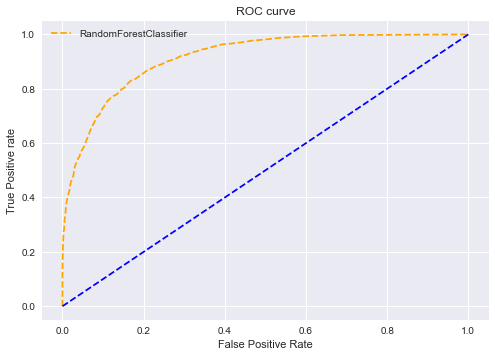

In [87]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# 10.Saving the model

In [88]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']